### 0. Import all the packages/libraries needed

In [ ]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

In [ ]:
# Plot the cost function for logistic regression
xvals = np.arange(0,1,0.01)
y1vals = 0-np.log(xvals)
y0vals = 0-np.log(1-xvals)
plt.plot(xvals, y1vals, 'b', label='y=1')
plt.plot(xvals, y0vals, 'g', label='y=0')
plt.title('Loss functions of logistic regression')
plt.legend()
plt.xlabel('Hypothesis: $h\\theta(x)$')
plt.ylabel('Loss');

### 1. Cost function
- 1.1. Prediction function for logistic regression
>The value of h(x) is the probability value that the sample $x_i$ belongs to category 1
$$
h_\theta(x)=\frac{1}{1+e^{-\theta^T x}}
$$
This is the hypothetical function of logistic regression. In fact, it is to add the sigmoid function to the result of the linear regression function.

$Z = \theta^T x$

Z = 0, the probability is $0.5$ -> boundary line

Z > 0, the probability is larger than 0.5 -> category 1

Z < 0, the probability is smaller than 0.5 -> category 0


- 1.2. Cost function
$$
\operatorname{Cost}\left(h_\theta, y\right)=\left\{\begin{array}{cl}
-\log \left(h_\theta(x)\right) & \text { if } y=1 \\
-\log \left(1-h_\theta(x)\right) & \text { if } y=0
\end{array}\right.
$$

- 1.3. **General term of cost function**
$$
\begin{aligned}
&J(\theta)=\frac{1}{m} \sum_{i=1}^m \operatorname{Cost}\left(h_\theta\left(x^i\right), y^i\right) \\
&=-\frac{1}{m}\left[\sum_{i=1}^m y^i \log h_\theta\left(x^i\right)+\left(1-y^i\right) \log \left(1-h_\theta\left(x^i\right)\right)\right]
\end{aligned}
$$


> Pseudo code

`first_half_term = multiply(y, log(y_pred))` 

`second_half_term = multiply((1-y), log(1-y_pred))`

`J(theta) = (-1/m) * summation(first_half_term + second_half_term)`

**The difference between sum and numpy.sum**
>sum works on NumPy's arrays and numpy.sum works on Python lists and they both return the same effective result but different types. [link](https://stackoverflow.com/questions/10922231/pythons-sum-vs-numpys-numpy-sum)

- 1.4.The derivate of the cost function for gradient descent:

    We need to minimize the cost/loss function:
Repeat \{
$$
\theta_j:=\theta_j-\alpha \frac{1}{m} \sum_{i=1}^m\left(h_\theta\left(x^i\right)-y^i\right) x_j^i
$$

### 2. Generate data


In [ ]:
from sklearn.datasets import make_classification
from matplotlib import pyplot as plt

# Generate classification dataset
x, y = make_classification(n_features=2, n_redundant=0, n_informative=1, n_clusters_per_class=1,random_state=2043)

plt.scatter(x[:,0], x[:,1], c=y)
plt.show()

In [ ]:
print(x.shape)

### 3. logistic regression model (python version)

In [8]:
import numpy as np
class LogisticRegression:
    '''
    default parameters: 
    regularization term =1
    learning_rate: 0.001
    iteration_numbers: 10000
    '''
    def __init__(self, penalty = None, Lambda = 1, lrate = 0.001, epochs = 10000):
        self.W = None
        self.penalty = penalty
        self.Lambda = Lambda
        self.lrate= lrate
        self.epochs = epochs
        self.sigmoid = lambda x:1/(1+ np.exp(-x))
    def loss(self, x, y):
        m = x.shape[0]

        y_pred = self.sigmoid(x * self.W)

        #TODO Complete the codes below
        first_half_term = np.multiply(y, np.log(y_pred))
        second_half_term = np.multiply((1-y), np.log(1-y_pred))
        loss = (-1/m) * np.sum(first_half_term + second_half_term)
        return loss

    def fit(self,x,y):
        lossList = []
        # calculate the number of data samples
        m = x.shape[0]
        X = np.concatenate((np.ones((m,1)), x), axis=1) # (100, 3)
        # calculate the number of features
        n = X.shape[1]
        # reshape the W into a matrix
        self.W = np.mat(np.ones((n,1)))

        XMat = np.mat(X) # Interpret the input as a matrix.
        # reshape y as a (m x 1) matrix
        YMat = np.mat(y.reshape(-1,1))
        # for loop
        for i in range(self.epochs):
            
            h = self.sigmoid(XMat * self.W)
            gradient = XMat.T * (h - YMat)/m

            # add regularization terms
            if self.penalty == 'l2':
                gradient = gradient + self.Lambda * self.W
            elif self.penalty == 'l1':
                gradient = gradient + self.Lambda * np.sign(self.W)
                # np.sign Returns an element-wise indication of the sign of a number

            self.W = self.W - self.lrate * gradient
            if i % 50 == 0:
                lossList.append(self.loss(XMat, YMat))
        return self.W, lossList


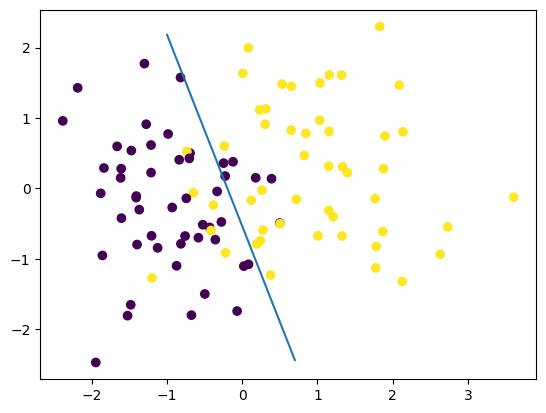

In [10]:
lr = LogisticRegression() #using default parameters
w,lossList = lr.fit(x,y)

# z=0 is the dividing line for linear classification
# w[0]+ x*w[1] + y* w[2]=0, calculate y 
x_test = [[-1],[0.7]]
y_test = (-w[0]-x_test*w[1])/w[2] 

plt.scatter(x[:,0],x[:,1],c=y)
plt.plot(x_test,y_test)
plt.show()